In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
comum = pd.read_excel('./DadosEntrada2.xlsx', sheet_name='Comum')
comum['Flag'] = comum['Flag'].str.rstrip('"')
comum['Flag'] = comum['Flag'].str.lstrip('"')
casos = pd.read_excel('./DadosEntrada2.xlsx', sheet_name='Casos')
casos['Flag'] = casos['Flag'].str.rstrip('"')
casos['Flag'] = casos['Flag'].str.lstrip('"')
display(comum)
display(casos)

,Parâmetro,Flag,Valor
0,Membrane area,-membrane_area,2.592000e+01
1,Membrane thickness,-membrane_thickness,9.500000e-05
2,Membrane porosity,-membrane_porosity,8.500000e-01
3,Pore diameter,-pore_diameter,3.200000e-07
4,Feed channel height,-feed_channel_height,2.000000e-03
5,Cold channel height,-cold_channel_height,2.000000e-03
6,Channel width,-channel_width,4.000000e-01
7,Spacer porosity,-spacer_porosity,7.800000e-01
8,Gap spacer porosity,-gap_spacer_porosity,8.400000e-01
9,Air gap thickness,-air_gap_thickness,8.000000e-04


,Parâmetro,Flag,Caso 1,Caso 2,Caso 3,Caso 4,Caso 5,Caso 6,Caso 7,Caso 8,...,Caso 18,Caso 19,Caso 20,Caso 21,Caso 22,Caso 23,Caso 24,Caso 25,Caso 26,Caso 27
0,Feed mass flow rate,-feed_mass_flow_rate,0.120715,0.331966,0.119409,0.328374,0.209066,0.241221,0.209066,0.241221,...,0.226341,0.223891,0.223891,0.111502,0.128651,0.30663,0.353791,0.225144,0.225144,0.225144
1,Coolant mass flow rate,-cool_mass_flow_rate,0.120715,0.331966,0.119409,0.328374,0.209066,0.241221,0.209066,0.241221,...,0.226341,0.223891,0.223891,0.111502,0.128651,0.30663,0.353791,0.225144,0.225144,0.225144
2,Vacuum pressure,-vacuum_pressure,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,...,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.00000,-81325.000000,-81325.000000,-81325.000000,-81325.000000
3,Feed temperature at the inlet,-entry_temperature_feed,60.000000,60.000000,80.000000,80.000000,70.000000,70.000000,70.000000,70.000000,...,60.000000,80.000000,80.000000,70.000000,70.000000,70.00000,70.000000,70.000000,70.000000,70.000000
4,Coolant temperature at the inlet,-entry_temperature_cool,25.000000,25.000000,25.000000,25.000000,20.000000,20.000000,30.000000,30.000000,...,30.000000,20.000000,30.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000
5,Feed salinity at the inlet,-entry_salinity_feed,0.140300,0.140300,0.140300,0.140300,0.035100,0.245500,0.035100,0.245500,...,0.140300,0.140300,0.140300,0.035100,0.245500,0.03510,0.245500,0.140300,0.140300,0.140300
6,Coolant salinity at the inlet,-entry_salinity_cool,0.140300,0.140300,0.140300,0.140300,0.035100,0.245500,0.035100,0.245500,...,0.140300,0.140300,0.140300,0.035100,0.245500,0.03510,0.245500,0.140300,0.140300,0.140300


In [3]:
num_casos = len(casos.columns) - 2

TCout = np.array([])
mass_flux = np.array([])

cmd_Comum = '../bin/vagmd '
for index, row in comum.iterrows():
    cmd_Comum += str(row['Flag']) + ' '
    if row['Parâmetro'] == 'Number of channels':
        cmd_Comum += str(int(row['Valor'])) + ' '
    else:
        cmd_Comum += str(row['Valor']) + ' '

for case in range(num_casos):
    
    cmd = cmd_Comum
    for index, row in casos.iterrows():
        cmd += str(row['Flag']) + ' '
        cmd += str(row[f'Caso {case+1}']) + ' '

    os.system(cmd)

    result = pd.read_csv('results/report.csv')

    TCout = np.append(TCout, float(result[result['Desalination module:'] == 'Coolant temperature at the outlet of the module ='].iat[0, 1]))
    mass_flux = np.append(mass_flux, float(result[result['Desalination module:'] == 'Mass flux ='].iat[0, 1]))


In [4]:
Dado_experimental = pd.read_excel('./DadosEntrada2.xlsx', sheet_name='Dado_experimental')
display(Dado_experimental)

,Mass flux,Coolant temperature at the outlet,Error mass flux,Error temperature
0,0.10,56.8,0.1980,0.196
1,0.90,55.2,0.2176,0.196
2,0.36,75.1,0.1980,0.196
3,1.90,73.4,0.2568,0.196
4,1.76,65.7,0.2764,0.196
5,0.34,63.5,0.1784,0.196
6,1.46,66.7,0.2372,0.196
7,0.11,64.4,0.1196,0.196
8,1.19,56.9,0.1980,0.196
9,0.04,55.0,0.1196,0.196


In [5]:
mass_flux_exp = Dado_experimental.iloc[:,0].to_numpy(dtype=float)
error_mass_flux = Dado_experimental.iloc[:,2].to_numpy(dtype=float)

TCout_exp= Dado_experimental.iloc[:,1].to_numpy(dtype=float)
error_temp = Dado_experimental.iloc[:,3].to_numpy(dtype=float)

Text(0.5, 1.0, 'Outlet temperature [°C]')

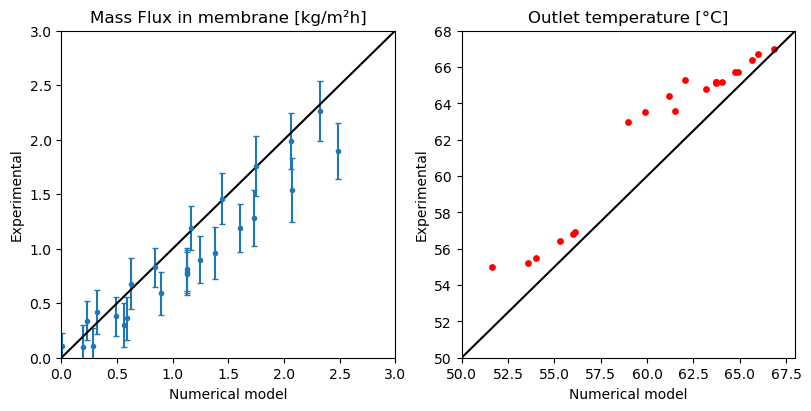

In [6]:
Tmin, Tmax = 50.0, 68.0
jmin, jmax = 0.0, 3.0

linej = np.linspace(jmin, jmax, 100)
lineT = np.linspace(Tmin, Tmax, 100)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.0, 4.0), layout='constrained')

axs[0].errorbar(mass_flux, mass_flux_exp, error_mass_flux, fmt='o', capsize=2, markersize=3)
#axs[0].scatter(mass_flux, mass_flux_exp, s=15)
axs[0].plot(linej, linej, color='black')
axs[0].set_xlim(jmin, jmax)
axs[0].set_ylim(jmin, jmax)
axs[0].set_xlabel('Numerical model')
axs[0].set_ylabel('Experimental')
axs[0].set_title('Mass Flux in membrane [kg/m²h]')

axs[1].scatter(TCout, TCout_exp, color='red', s=15)
axs[1].plot(lineT, lineT, color='black')
axs[1].set_xlim(Tmin, Tmax)
axs[1].set_ylim(Tmin, Tmax)
axs[1].set_xlabel('Numerical model')
axs[1].set_ylabel('Experimental')
axs[1].set_title('Outlet temperature [°C]')

#plt.savefig('validacao.png',dpi=300)

In [7]:
err = abs((mass_flux - mass_flux_exp) * 100 / mass_flux_exp)
print(err)

[9.64487985e+01 3.82732568e+01 6.45863075e+01 3.09531515e+01
 5.98841722e-01 3.23654368e+01 9.41185719e-01 9.34151512e+01
 1.87087355e+00 2.65559694e+02 3.59649305e+00 2.30909469e+01
 2.81354733e+01 1.57127523e+02 3.44589038e+01 3.45366410e+01
 5.13059656e+01 8.71027220e+01 3.51248502e+01 4.33641547e+01
 1.78021939e+00 4.39710873e+03 2.65286966e+00 7.77659382e+00
 4.70943753e+01 3.98304555e+01 4.33704671e+01]


In [8]:
np.sort(abs((mass_flux - mass_flux_exp)) * 100 / mass_flux_exp)

array([5.98841722e-01, 9.41185719e-01, 1.78021939e+00, 1.87087355e+00,
       2.65286966e+00, 3.59649305e+00, 7.77659382e+00, 2.30909469e+01,
       2.81354733e+01, 3.09531515e+01, 3.23654368e+01, 3.44589038e+01,
       3.45366410e+01, 3.51248502e+01, 3.82732568e+01, 3.98304555e+01,
       4.33641547e+01, 4.33704671e+01, 4.70943753e+01, 5.13059656e+01,
       6.45863075e+01, 8.71027220e+01, 9.34151512e+01, 9.64487985e+01,
       1.57127523e+02, 2.65559694e+02, 4.39710873e+03])

In [9]:
mass_flux

array([ 0.1964488 ,  1.24445931,  0.59251071,  2.48810988,  1.74946039,
        0.22995751,  1.44625869,  0.00724333,  1.1677366 , -0.06622388,
        2.06157021,  0.32301802,  0.4869148 ,  0.28284028,  2.07066712,
        1.60098603,  0.8927052 ,  0.56130817,  1.72959808,  1.37629588,
        0.84477582, -0.42971087,  2.31995485,  0.62711916,  1.13262669,
        1.13262669,  1.13262669])

In [10]:
negative_positions = np.where(mass_flux < 0)[0]
print(negative_positions)

[ 9 21]


In [11]:
np.sort(mass_flux)

array([-0.42971087, -0.06622388,  0.00724333,  0.1964488 ,  0.22995751,
        0.28284028,  0.32301802,  0.4869148 ,  0.56130817,  0.59251071,
        0.62711916,  0.84477582,  0.8927052 ,  1.13262669,  1.13262669,
        1.13262669,  1.1677366 ,  1.24445931,  1.37629588,  1.44625869,
        1.60098603,  1.72959808,  1.74946039,  2.06157021,  2.07066712,
        2.31995485,  2.48810988])